In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [2]:
# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc', root='insightface_model', providers=['CPUExecutionProvider'])
faceapp.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5) # don't set det_thresh < 0.3



Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
#faceapp.get()

### Extract facial features and label

In [4]:
import re # regular expression

In [5]:
def clean_string(string):
    string = re.sub(r'[^A-Za-z]', ' ', string)
    string = string.title()
    return string

In [6]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split("-")
    role = clean_string(role)
    name = clean_string(name)
    # print(f'{name} is {role}')
    
    # path of each image in respective folder
    img_files = os.listdir(path = f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)
        
        # step-2: get info
        result = faceapp.get(img_arr, max_num = 1) # return list
        if len(result) > 0:
            # step-3: extract facial embedding
            res = result[0]
            embedding = res['embedding']
        
            # step-4: save all info name, role, embedding, in a list
            person_info.append([name, role, embedding])
        
        

In [7]:
data_frame = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
data_frame # store in redis

,Name,Role,Facial_Features
0,Barack Obama,Teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099..."
1,Barack Obama,Teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014..."
2,Barack Obama,Teacher,"[2.2778592, -1.3971025, 1.563463, -1.4800109, ..."
3,Barack Obama,Teacher,"[-0.065466456, 0.015240222, -0.85319084, -0.32..."
4,Barack Obama,Teacher,"[0.33165765, -1.2775139, 0.40062493, -1.360396..."
5,Barack Obama,Teacher,"[1.4105674, -0.41731554, -0.4466652, -1.443361..."
6,Barack Obama,Teacher,"[1.6049532, -0.24349228, 0.36104465, 0.0407292..."
7,Barack Obama,Teacher,"[0.5897457, 0.43560246, 0.35933226, -2.803235,..."
8,Barack Obama,Teacher,"[0.7226656, -0.9443346, -0.0875811, -2.4037802..."
9,Barack Obama,Teacher,"[0.04952857, -0.49288934, -0.19513485, -1.1228..."


### Inference

### Step 1: Read Image

In [8]:
# read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Step 2: Extract Feature

In [9]:
res_test = faceapp.get(img_test, max_num = 0)
embed_test = []
for rt in res_test:
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score'] * 100)
    embed_test = rt['embedding']
    

In [10]:
# consider only one sample
len(embed_test)
embed_test

array([-1.0785795 , -1.1072035 , -1.2359028 , -1.1190417 ,  1.6916184 ,
        1.2588977 , -0.42485052,  1.2528399 ,  1.9024427 ,  1.1879566 ,
       -2.2456725 ,  2.0354242 , -0.16842246,  0.53058004,  0.30028483,
       -0.21257854,  0.3056281 , -1.0242338 ,  0.23906758,  1.2245314 ,
       -0.31446412, -1.1225427 ,  2.4335988 ,  1.0288785 ,  0.6126595 ,
       -1.2186719 ,  1.4719703 , -0.37878704, -1.1319803 ,  1.2428073 ,
        1.1628743 ,  0.49313593,  0.968555  ,  0.03850073,  0.40863132,
       -0.413023  ,  0.01802665,  0.35701555,  0.91273737, -0.13445064,
       -1.5695534 ,  1.4075103 ,  0.95294166, -0.38528562,  0.08793437,
       -0.47209278, -0.2068274 ,  1.1180981 ,  0.77529645, -0.74925244,
       -2.0977917 ,  0.9927349 , -1.8607528 , -2.0641649 , -0.8853118 ,
       -0.03283094,  2.2557952 ,  0.24470145, -0.39092267, -1.2569765 ,
       -0.8223587 ,  0.22203036,  0.57044303,  0.37372783, -1.178931  ,
        0.8613467 ,  0.08270417,  0.7168833 ,  1.316746  ,  0.48

In [11]:
data_frame.head()

,Name,Role,Facial_Features
0,Barack Obama,Teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099..."
1,Barack Obama,Teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014..."
2,Barack Obama,Teacher,"[2.2778592, -1.3971025, 1.563463, -1.4800109, ..."
3,Barack Obama,Teacher,"[-0.065466456, 0.015240222, -0.85319084, -0.32..."
4,Barack Obama,Teacher,"[0.33165765, -1.2775139, 0.40062493, -1.360396..."


In [12]:
X_list = data_frame["Facial_Features"].tolist()
X = np.asarray(X_list)

In [13]:
X.shape

(50, 512)

In [14]:
from sklearn.metrics import pairwise

In [15]:
y = embed_test.reshape(1, -1) # 1 x 512 or .reshape(1, 512)
euclidean_distances = pairwise.euclidean_distances(X, y)
manhattan_distances = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [16]:
data_search = data_frame.copy()
data_search['euclidean'] = euclidean_distances
data_search['manhattan'] = manhattan_distances
data_search['cosine'] = cosine_similar

In [17]:
data_search

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Barack Obama,Teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099...",35.685818,644.639532,-0.095821
1,Barack Obama,Teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014...",32.884262,589.943204,-0.134625
2,Barack Obama,Teacher,"[2.2778592, -1.3971025, 1.563463, -1.4800109, ...",34.865894,639.163588,-0.094111
3,Barack Obama,Teacher,"[-0.065466456, 0.015240222, -0.85319084, -0.32...",36.929321,662.520381,-0.070045
4,Barack Obama,Teacher,"[0.33165765, -1.2775139, 0.40062493, -1.360396...",34.171993,614.056663,-0.008363
5,Barack Obama,Teacher,"[1.4105674, -0.41731554, -0.4466652, -1.443361...",35.303631,656.479692,-0.074950
6,Barack Obama,Teacher,"[1.6049532, -0.24349228, 0.36104465, 0.0407292...",35.881924,654.347307,-0.074587
7,Barack Obama,Teacher,"[0.5897457, 0.43560246, 0.35933226, -2.803235,...",34.694305,634.587962,-0.084586
8,Barack Obama,Teacher,"[0.7226656, -0.9443346, -0.0875811, -2.4037802...",35.139378,637.096814,-0.034376
9,Barack Obama,Teacher,"[0.04952857, -0.49288934, -0.19513485, -1.1228...",33.291656,599.762273,-0.031118


In [18]:
data_search.head(2)

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Barack Obama,Teacher,"[0.8677718, -0.26744574, 0.07075435, -0.144099...",35.685818,644.639532,-0.095821
1,Barack Obama,Teacher,"[1.6967477, -0.99423957, -0.22416869, -1.75014...",32.884262,589.943204,-0.134625


In [19]:
import matplotlib.pyplot as plt

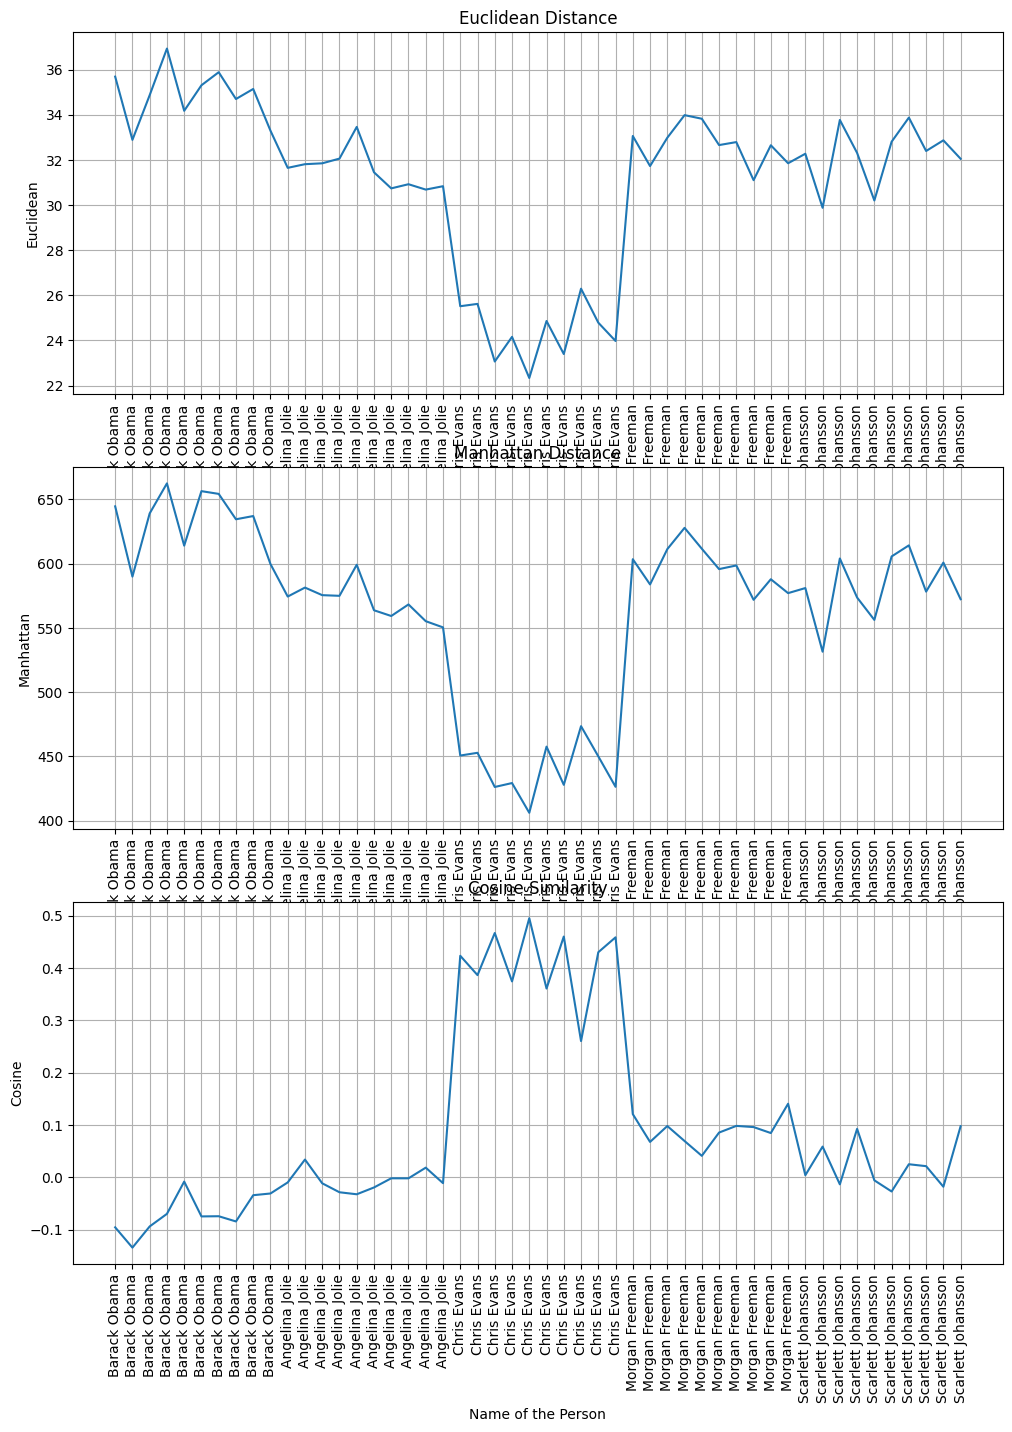

In [20]:
plt.figure(figsize=(12,16))

plt.subplot(3,1,1)
plt.plot(data_search['euclidean'])
plt.xticks(ticks=list(range(len(data_search['euclidean']))), labels=data_search["Name"], rotation = 90)
plt.xlabel('Name of the Person')
plt.ylabel('Euclidean')
plt.title("Euclidean Distance")
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))), labels=data_search["Name"], rotation = 90)
plt.xlabel('Name of the Person')
plt.ylabel('Manhattan')
plt.title("Manhattan Distance")

plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))), labels=data_search["Name"], rotation = 90)
plt.xlabel('Name of the Person')
plt.ylabel('Cosine')
plt.title("Cosine Similarity")

plt.grid()

plt.show()

### Identify the person using Euclidean distance

In [21]:
d_eq_optimal = 25

In [22]:
data_filter = data_search.query(f'euclidean < {d_eq_optimal}')
data_filter.reset_index(drop=True, inplace=True)
if len(data_filter) > 0:
    argmin = data_filter['euclidean'].argmin()
    name, role = data_filter.loc[argmin][['Name', 'Role']]
else:
    name = 'Unknown'
    role = 'Unknown'


In [23]:
print(name, role)

Chris Evans Student


### Identify the person using manhattan distance

In [24]:
d_eq_optimal = 450


In [25]:
data_filter = data_search.query(f'manhattan < {d_eq_optimal}')
data_filter.reset_index(drop=True, inplace=True)
if len(data_filter) > 0:
    argmin = data_filter['manhattan'].argmin()
    name_man, role_man = data_filter.loc[argmin][['Name', 'Role']]
else:
    name_man = 'Unknown'
    role_man = 'Unknown'


In [26]:
print(name_man, role_man)


Chris Evans Student


### Identify the person using cosine similarity

In [27]:
s_opt = 0.4

In [28]:
data_filter = data_search.query(f'cosine > {s_opt}')
data_filter.reset_index(drop=True, inplace=True)
if len(data_filter) > 0:
    argmax = data_filter['cosine'].argmax()
    name_cos, role_cos = data_filter.loc[argmax][['Name', 'Role']]
else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'


In [29]:
print(name_cos, role_cos)


Chris Evans Student


In [30]:
data_filter

,Name,Role,Facial_Features,euclidean,manhattan,cosine
0,Chris Evans,Student,"[1.7492044, -2.1218064, -0.15239638, -0.905720...",25.514286,450.670651,0.423421
1,Chris Evans,Student,"[1.3108517, -2.0901608, -1.0368989, -1.7980275...",23.064388,426.207376,0.466915
2,Chris Evans,Student,"[0.59088683, -1.4150397, -0.67269367, -1.31097...",22.335033,406.105201,0.495242
3,Chris Evans,Student,"[0.35467762, -0.69756144, -0.30049866, -1.9114...",23.396021,427.879617,0.460184
4,Chris Evans,Student,"[0.4494092, -1.6313883, -0.9509721, -1.5428782...",24.786192,450.061177,0.430181
5,Chris Evans,Student,"[0.8588394, -1.1002173, -0.77001274, -1.491779...",23.973528,426.329300,0.458686


### Identify Multiple Person

In [31]:
def ml_search_algorithm(data_frame, feature_column, test_vector, name_role=['Name', 'Role'], thresh=0.5):
    """
    Cosine similarty base search algorithm
    """

    # Step1: take the dataframe
    data_frame = data_frame.copy()

    # Step2: index face embedding and convert to array
    x_list = data_frame[feature_column].tolist()
    x = np.asarray(x_list)

    # Step3: calc cosine similarity
    similar = pairwise.cosine_similarity(x, test_vector.reshape(1, -1))
    similar_arr = np.array(similar).flatten()
    data_frame['cosine'] = similar_arr

    # Step4: filter the data
    data_filter = data_frame.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role

In [32]:
# Get test image
test_image = cv2.imread('test_images/test_11.jpg')
cv2.imshow('test image', test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [33]:
# Step1: take the test image and apply to insight face
result = faceapp.get(test_image)
test_copy = test_image.copy()

# Step2: use for loop to extract each embedding and pass to ml_search_algorithm
for res in result:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(data_frame_compress, 'Facial_Features', test_vector=embeddings)
    if person_name != 'Unknown':
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)
    cv2.rectangle(test_copy, (x1, y1), (x2, y2), color)
    text_gen = person_name
    cv2.putText(test_copy, text_gen, (x1, y1-10), cv2.FONT_HERSHEY_DUPLEX, 0.6, color, 1)

cv2.imshow('test image', test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
    

NameError: name 'data_frame_compress' is not defined

### Compressing Data Set

In [35]:
data_frame_compress = data_frame.groupby(by=['Name', 'Role']).mean()
data_frame_compress.reset_index(inplace=True)
data_frame_compress

,Name,Role,Facial_Features
0,Angelina Jolie,Student,"[0.43222713, 1.074822, -0.12857957, -1.8332443..."
1,Barack Obama,Teacher,"[0.948603, -0.558349, 0.09484784, -1.2796344, ..."
2,Chris Evans,Student,"[0.72012275, -1.4683539, -0.77757514, -1.46026..."
3,Morgan Freeman,Teacher,"[0.4857939, -0.61931694, -0.4072946, 1.0686711..."
4,Scarlett Johansson,Student,"[0.1913062, -0.48871604, -1.6904205, 0.4424578..."


### Convert Dataframe into Array and save in numpy zip format

In [ ]:
x_values = data_frame_compress.values

In [34]:
col_name = np.array(data_frame_compress.columns)
col_name

NameError: name 'data_frame_compress' is not defined

In [ ]:
np.savez('data_frame_students_teachers.npz', x_values, col_name)

In [ ]:
# load numpy zip
file_np = np.load('data_frame_students_teachers.npz',allow_pickle=True)
file_np.files

In [ ]:
pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])